# Background:

Sentiment analysis is basically the process of analyzing the sentiments of people through various platforms like social media and similar websites, where people can freely express their feelings and opinions about anything they think.

### About the problem and the dataset used.

- The data set in consideration is a combination of the world news and stock price shifts.
- Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
- There are 25 columns of top news headlines for each day in the data frame.
- Class 1- the stock price increased.
- Class 0- the stock price stayed the same or decreased.

### About the approach.

- Used TF-IDF and Bag of Words for extracting featues from the headlines.
- Used Random Forest Classifier, Multinational Naive Bayes and Passive Aggressive Classifier for analysis.
- Algorithms used were: RandomForestClassifier , LogisticRegression , KNeighborsClassifier , DecisionTreeClassifier , SVC and a stacked version of the algorithms


# Stock Sentiment Analysis - Evaluating algorithms and diferent approaches 

## 0. Starter

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
url = 'https://raw.githubusercontent.com/krishnaik06/Stock-Sentiment-Analysis/master/Data.csv'

In [129]:
df = pd.read_csv(url, encoding = "ISO-8859-1" )

In [130]:
df.shape

(4101, 27)

In [131]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### Define train  and test 

In [132]:
# Define traina and test data set 

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [133]:
train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


## 1. Data Preprocessing 

- 1 Preprocessing (lowercase, stemming, lemmatization or remove stopwords )
- 2 Ngrams can help to use local context
- 3 Post processing using TFIdf

In [134]:
# Removing punctuations
data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1] #  convert to string 
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [135]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [136]:
# Combine all the senteces to be able to combine sentecnes into vectors

' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [137]:
# Aplpy the combination to the entire dataset 

headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [139]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

## 2. Modelling

### Define wrapper function 
The following wraper function could be used to evaluat the perfomrance of algoritms and methods such as Countvectorizer and TF idf

**Define the test dataset**

In [146]:
# Predict for the Test Dataset

test_transform= []

for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

train_df = tfvector.fit_transform(headlines)
test_dataset = tfvector.transform(test_transform)

In [149]:
from sklearn.metrics import accuracy_score , confusion_matrix

seed = 0 

def wrapper(method,algorithm = RandomForestClassifier (n_estimators = 200, criterion='entropy', random_state = seed )): 
    """
    This function will return the accuracy score between methods . We use random forest as standard medthod 
    """
    print('Loading df..')
    traindataset = method.fit_transform(headlines)
    print('training the algorithm..')
    current_algo = algorithm
    current_algo.fit(traindataset,train['Label'])
    print('transforming test data')
    test_transform = []
    for row in range(0,len(test.index)):
        test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
        test_dataset = method.transform(test_transform)
    print('computing predictions...')
    # 4 Do predictions 
    predictions = current_algo.predict(test_dataset)
    score = accuracy_score(test['Label'],predictions)
    return score 

### 2.1. Count Vectorizer 

In [152]:
# test 2 methods 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

countvector = CountVectorizer(ngram_range=(2,2))

countvector_score = wrapper(method = countvector )

Loading df..
training the algorithm..
transforming test data
computing predictions...


In [153]:
countvector_score

0.8518518518518519

**Result** We acheived 0.8518518518518519 with COUNT VECTORIZER

### 2.2. TF-IDF


In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvector = TfidfVectorizer(ngram_range=(2,3))
tfvector_score = wrapper(method = tfvector)

Loading df..
training the algorithm..
transforming test data
computing predictions...


In [155]:
tfvector_score

0.8333333333333334

**Result** We acheived 0.8333333333333334 with TF-IDF

### 2.3. PassiveAggressiveClassifier

- Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
- Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [100]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(train_df,train['Label'])

predictions = pa.predict(test_dataset)

In [ ]:
score = accuracy_score(test['Label'],predictions)
print(score)


**Result** We acheived 0.86 with PassiveAggressiveClassifier

In [ ]:
# We achienve the best score so far

### 2.4.  Naive Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(train_df , train['Label'])

MultinomialNB()

In [106]:
from sklearn import metrics
predicted = MNB.predict(test_dataset)
accuracy_score = metrics.accuracy_score(predicted, test['Label'])

In [107]:
accuracy_score

0.8518518518518519

### 2.5. Compare nlp methods and algoritms 

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 0 

# 1. Define the algorithms
models = []
models.append(('RF' , RandomForestClassifier(n_estimators = 200, criterion='entropy', random_state = seed )))
models.append(('LR', LogisticRegression( random_state = seed )))
models.append(('KNN', KNeighborsClassifier( )))
models.append(('CART', DecisionTreeClassifier( random_state = seed )))
models.append(('SVM', SVC( random_state = seed )))

In [174]:
# 2. Define the methods to train 

method1 = CountVectorizer(ngram_range=(2,2))
method2 = TfidfVectorizer(ngram_range=(2,3))
methods = [ method1 ,method2]

results = []
names = []

for name, model in models: 
    for method in methods:
        print(f'Calculating algo {name} and method {method}')
        score = wrapper(method = method , algorithm = model )
        results.append(score)
        names.append(name)
        msg = "%s: %f" % (name, score)
        print(msg)

Calculating algo RF and method CountVectorizer(ngram_range=(2, 2))
Loading df..
training the algorithm..
transforming test data
computing predictions...
RF: 0.851852
Calculating algo RF and method TfidfVectorizer(ngram_range=(2, 3))
Loading df..
training the algorithm..
transforming test data
computing predictions...
RF: 0.833333
Calculating algo LR and method CountVectorizer(ngram_range=(2, 2))
Loading df..
training the algorithm..
transforming test data
computing predictions...
LR: 0.857143
Calculating algo LR and method TfidfVectorizer(ngram_range=(2, 3))
Loading df..
training the algorithm..
transforming test data
computing predictions...
LR: 0.851852
Calculating algo KNN and method CountVectorizer(ngram_range=(2, 2))
Loading df..
training the algorithm..
transforming test data
computing predictions...
KNN: 0.555556
Calculating algo KNN and method TfidfVectorizer(ngram_range=(2, 3))
Loading df..
training the algorithm..
transforming test data
computing predictions...
KNN: 0.613757


Here we can clearly see that Logistic Regresion gave us the best score compared to other algorithms

<AxesSubplot:>

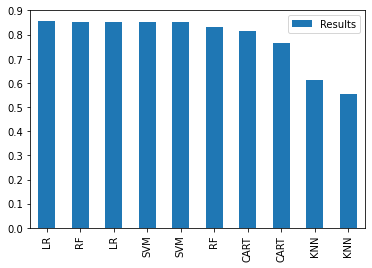

In [194]:
final_results = pd.DataFrame({'Results':results }, index = names)
final_results.sort_values(by =  'Results' , ascending = False).plot(kind = 'bar')

In [ ]:
# Random forest varies depending on the optimization method we use


In [ ]:
max(results)

# max 0.8571428571428571 with LR and count vectorizer 

### 2.6. Autoencoders for NLP (upcoming...) 

### Reflections
- Count vectorizer and Logistic Regression has achieved the best results 0.8571428571428571. 
- Stacking is not applicable
- 

In [195]:
import datetime
# # 1 Get the current path 

# s = ! pwd
# current_path = ''
# for i in s: 
#     current_path+= i
# 2 Pull request
! git pull

# 3
now = datetime.datetime.now()
commit_message = "Last run on " + str(now)
! cd '/Users/Tabe/Desktop/Courses/Data-Science /Test-Projects/Machine-Learning-Projects/Machine-Learning-Projects/Stock Sentiment Analysis'
! echo $commit_message > commit_message.txt
! git add . 
! git commit -F commit_message.txt
! git push origin main # here I choose either master or branch 
print ('Done!')

Already up to date.
[main ae67f53] Last run on 2020-12-12 11:55:29.327137
 3 files changed, 3961 insertions(+), 6097 deletions(-)
 rewrite Stock Sentiment Analysis/.ipynb_checkpoints/Stock Sentiment Analysis-checkpoint.ipynb (92%)
 rewrite Stock Sentiment Analysis/Stock Sentiment Analysis.ipynb (92%)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 8.78 KiB | 898.00 KiB/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/tabers77/Machine-Learning-Projects.git
   8bc49a7..ae67f53  main -> main
Done!
